# EDA


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164346 entries, 0 to 164345
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      164346 non-null  int64 
 1   ProductId               164346 non-null  object
 2   UserId                  164346 non-null  object
 3   ProfileName             164335 non-null  object
 4   HelpfulnessNumerator    164346 non-null  int64 
 5   HelpfulnessDenominator  164346 non-null  int64 
 6   Score                   164346 non-null  int64 
 7   Time                    164346 non-null  int64 
 8   Summary                 164340 non-null  object
 9   Text                    164346 non-null  object
dtypes: int64(5), object(5)
memory usage: 12.5+ MB


In [ ]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [ ]:
# Seleccionamos columnas relevantes
df = df[['Score', 'Summary', 'Text']].dropna()

# Eliminamos reseñas con score = 3 (neutras)
df = df[df['Score'] != 3]

# Etiqueta binaria: 1 si Score >= 4 (positiva), 0 si <= 2 (negativa)
df['label'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Combinamos Summary y Text en una sola columna de texto
df['text_raw'] = (df['Summary'].fillna('') + '. ' + df['Text'].fillna('')).str.strip()

print("Columnas actuales:", df.columns.tolist())
print(df['label'].value_counts())

Columnas actuales: ['Score', 'Summary', 'Text', 'label', 'text_raw']
label
1    127581
0     23928
Name: count, dtype: int64


Tamaño del dataset: (151509, 5)

Tipos de datos:
Score        int64
Summary     object
Text        object
label        int64
text_raw    object
dtype: object

Valores nulos por columna:
Score       0
Summary     0
Text        0
label       0
text_raw    0
dtype: int64


/tmp/ipython-input-3829991410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='Blues')


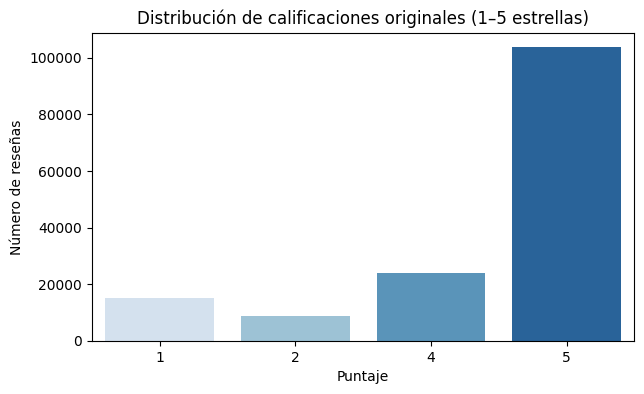

/tmp/ipython-input-3829991410.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='RdBu')


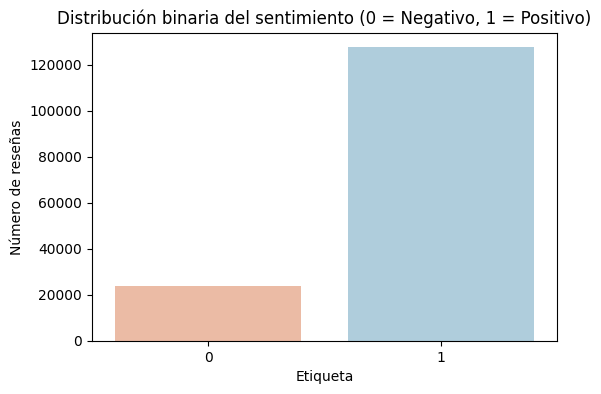

Promedio de palabras por reseña: 84.10837640008184
count    151509.000000
mean         84.108376
std          79.754568
min          10.000000
25%          37.000000
50%          60.000000
75%         102.000000
max        2526.000000
Name: len, dtype: float64


/tmp/ipython-input-3829991410.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='len', data=df, palette='coolwarm')


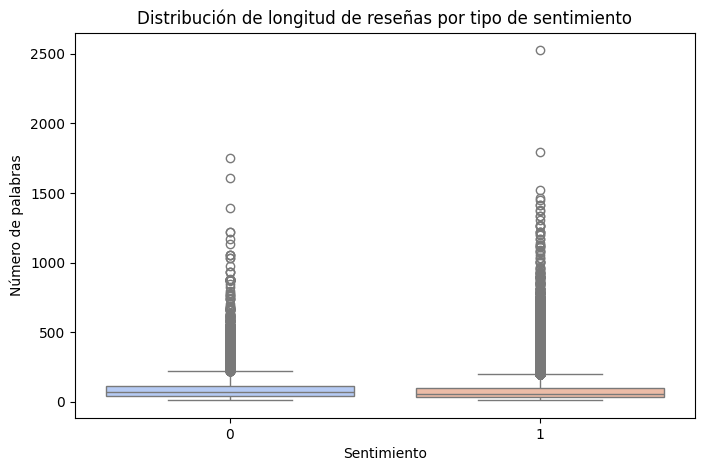

/tmp/ipython-input-3829991410.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Score', y='len', data=df, palette='pastel')


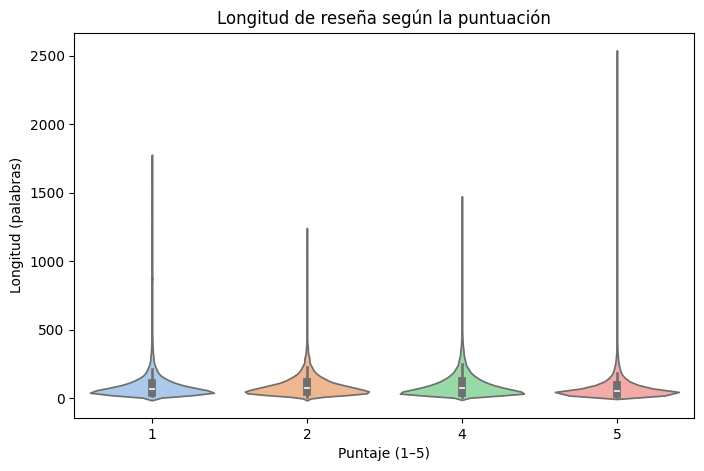

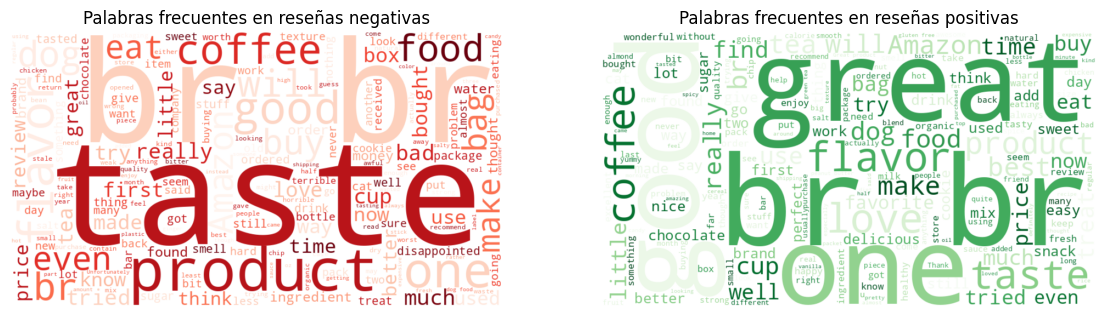

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Vista general
print("Tamaño del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 2. Distribución de scores originales
plt.figure(figsize=(7,4))
sns.countplot(x='Score', data=df, palette='Blues')
plt.title("Distribución de calificaciones originales (1–5 estrellas)")
plt.xlabel("Puntaje")
plt.ylabel("Número de reseñas")
plt.show()

# 3. Distribución binaria
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='RdBu')
plt.title("Distribución binaria del sentimiento (0 = Negativo, 1 = Positivo)")
plt.xlabel("Etiqueta")
plt.ylabel("Número de reseñas")
plt.show()

# 4. Longitud del texto
df['len'] = df['text_raw'].str.split().apply(len)
print("Promedio de palabras por reseña:", df['len'].mean())
print(df['len'].describe())

plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='len', data=df, palette='coolwarm')
plt.title("Distribución de longitud de reseñas por tipo de sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Número de palabras")
plt.show()

# 5. Relación longitud - score
plt.figure(figsize=(8,5))
sns.violinplot(x='Score', y='len', data=df, palette='pastel')
plt.title("Longitud de reseña según la puntuación")
plt.xlabel("Puntaje (1–5)")
plt.ylabel("Longitud (palabras)")
plt.show()

# 6. WordClouds (opcional si quieres visuales descriptivos)
text_pos = " ".join(df[df['label']==1]['text_raw'].sample(2000, random_state=42))
text_neg = " ".join(df[df['label']==0]['text_raw'].sample(2000, random_state=42))

wc_pos = WordCloud(width=900, height=500, background_color='white', colormap='Greens').generate(text_pos)
wc_neg = WordCloud(width=900, height=500, background_color='white', colormap='Reds').generate(text_neg)

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].imshow(wc_neg, interpolation='bilinear')
ax[0].set_title("Palabras frecuentes en reseñas negativas")
ax[0].axis("off")

ax[1].imshow(wc_pos, interpolation='bilinear')
ax[1].set_title("Palabras frecuentes en reseñas positivas")
ax[1].axis("off")
plt.show()

# Transformaciones


In [ ]:
#Eliminar stopwords de Text
# ===============================================================
# 🧹 Limpieza de texto: eliminación de stopwords en columna 'Text'
# ===============================================================

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

df=pd.read_csv('Reviews.csv')

# ===============================================================
# 🔧 Descargar stopwords
# ===============================================================
# 🔽 Descargar lista de stopwords de NLTK (solo la primera vez)
nltk.download("stopwords")

# ===============================================================
# 🔧 Definir lista de stopwords y función de limpieza
# ===============================================================
STOPWORDS = set(stopwords.words("english"))

def clean_text(text):
    """
    Limpia el texto eliminando símbolos, números,
    espacios extra y stopwords.
    """
    if not isinstance(text, str):
        return ""
    # 🔹 Pasar a minúsculas
    text = text.lower()
    # 🔹 Quitar URLs y caracteres no alfabéticos
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    # 🔹 Eliminar espacios extra
    text = re.sub(r"\s+", " ", text).strip()
    # 🔹 Eliminar stopwords
    tokens = [word for word in text.split() if word not in STOPWORDS]
    return " ".join(tokens)

# ===============================================================
# 🧠 Aplicar limpieza
# ===============================================================
df["text_clean"] = df["Text"].apply(clean_text)

# ===============================================================
# 💾 Guardar el nuevo DataFrame limpio
# ===============================================================
df_clean = df[["Id", "ProductId", "UserId", "ProfileName",
               "HelpfulnessNumerator", "HelpfulnessDenominator",
               "Score", "Time", "Summary", "text_clean"]]

df_clean.to_csv("reviews_clean.csv", index=False)

print("✅ DataFrame limpio creado y guardado como 'reviews_clean.csv'")
print(df_clean[["text_clean"]].sample(5))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ DataFrame limpio creado y guardado como 'reviews_clean.csv'
                                               text_clean
238251  bought imported sweet potato chips less half p...
346932  eat daily tastes great tell difference quaker ...
161169  convenient good price amazon live meat loving ...
89473   izze natural sparkling pomegranate juice nice ...
150697  big fan starbucks coffeebean chai tea latte ex...


# Modelo

In [ ]:
# ===============================================================
# 🎯 CREACIÓN DE ETIQUETAS (positivo / negativo)
# ===============================================================
df_clean = pd.read_csv("reviews_clean.csv")
# Solo conservar reseñas con score claramente positivo o negativo
df_sentiment = df_clean[df_clean["Score"] != 3].copy()

# Etiqueta binaria: 1 = positivo, 0 = negativo
df_sentiment["sentiment"] = (df_sentiment["Score"] > 3).astype(int)

print(df_sentiment["sentiment"].value_counts())
print(df_sentiment[["Score", "sentiment"]].sample(5))


sentiment
1    309012
0     57724
Name: count, dtype: int64
        Score  sentiment
220086      5          1
64500       5          1
280351      4          1
198888      5          1
99542       5          1


📊 Estadísticas de longitud de los textos (en palabras):
🔹 Mínimo:   1
🔹 Máximo:   1677
🔹 Promedio: 40.26


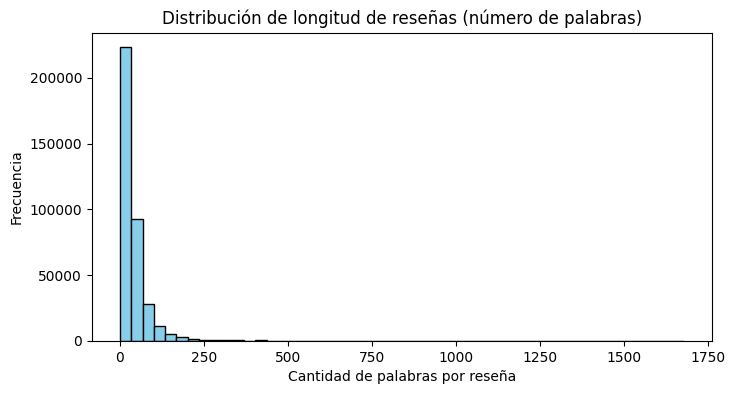

In [ ]:
# ===============================================================
# 📏 Estadísticas de longitud del texto limpio
# ===============================================================

# Calcular longitud (número de palabras) de cada reseña
df_sentiment["text_len"] = df_sentiment["text_clean"].apply(lambda x: len(str(x).split()))

# Calcular métricas descriptivas
min_len = df_sentiment["text_len"].min()
max_len = df_sentiment["text_len"].max()
avg_len = df_sentiment["text_len"].mean()

print("📊 Estadísticas de longitud de los textos (en palabras):")
print(f"🔹 Mínimo:   {min_len}")
print(f"🔹 Máximo:   {max_len}")
print(f"🔹 Promedio: {avg_len:.2f}")

# (Opcional) Distribución visual
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df_sentiment["text_len"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribución de longitud de reseñas (número de palabras)")
plt.xlabel("Cantidad de palabras por reseña")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 🔧 Hiperparámetros
config = {
    "vocab_size": 20000,
    "max_len": 150,
    "embed_dim": 64,
    "rnn_units": 128,
    "dropout": 0.4,
    "batch_size": 64,
    "epochs": 5,
    "learning_rate": 1e-3
}
# Reemplazar NaN o valores no string por cadena vacía
df_sentiment["text_clean"] = df_sentiment["text_clean"].fillna("").astype(str)

# ===============================================================
# 🧠 Tokenización y división
# ===============================================================
tok = Tokenizer(num_words=config["vocab_size"], oov_token="<OOV>")
tok.fit_on_texts(df_sentiment["text_clean"])

X = tok.texts_to_sequences(df_sentiment["text_clean"])
X = pad_sequences(X, maxlen=config["max_len"], padding="post", truncating="post")

y = df_sentiment["sentiment"].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

print("✅ Datos listos")
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)


✅ Datos listos
Train shape: (293388, 150)
Val shape: (73348, 150)


In [ ]:
# ===============================================================
# ⚙️ Verificar disponibilidad de GPU en Colab
# ===============================================================
import tensorflow as tf

print("🔍 Versión de TensorFlow:", tf.__version__)
print("🚀 GPU disponible:", tf.config.list_physical_devices('GPU'))

if tf.test.gpu_device_name():
    print("✅ TensorFlow está usando la GPU:", tf.test.gpu_device_name())
else:
    print("⚠️ TensorFlow NO está usando GPU. Verifica en Entorno de ejecución → Cambiar tipo de entorno → GPU.")


🔍 Versión de TensorFlow: 2.19.0
🚀 GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ TensorFlow está usando la GPU: /device:GPU:0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
4585/4585 ━━━━━━━━━━━━━━━━━━━━ 2194s 477ms/step - accuracy: 0.8421 - loss: 0.4435 - val_accuracy: 0.8442 - val_loss: 0.4327
Epoch 2/5
4585/4585 ━━━━━━━━━━━━━━━━━━━━ 2192s 478ms/step - accuracy: 0.8446 - loss: 0.4339 - val_accuracy: 0.8444 - val_loss: 0.4309
Epoch 3/5
4585/4585 ━━━━━━━━━━━━━━━━━━━━ 2236s 488ms/step - accuracy: 0.8705 - loss: 0.3486 - val_accuracy: 0.9351 - val_loss: 0.1688
Epoch 4/5
4585/4585 ━━━━━━━━━━━━━━━━━━━━ 2189s 478ms/step - accuracy: 0.9343 - loss: 0.1734 - val_accuracy: 0.9424 - val_loss: 0.1532
Epoch 5/5
4585/4585 ━━━━━━━━━━━━━━━━━━━━ 2222s 485ms/step - accuracy: 0.9453 - loss: 0.1490 - val_accuracy: 0.9452 - val_loss: 0.1514
✅ Accuracy de validación: 0.9452


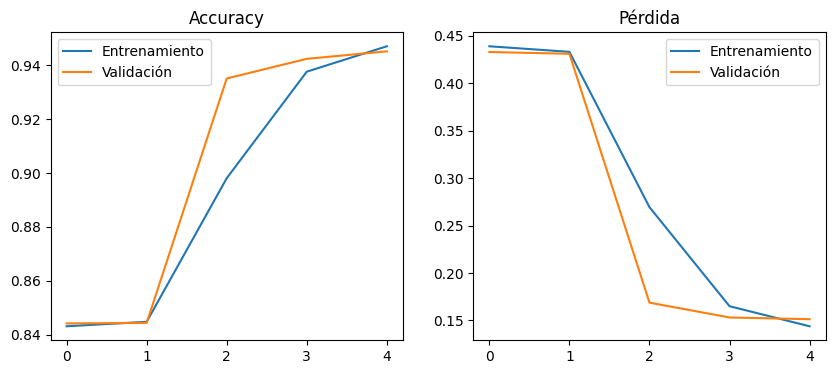

In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt

# ===============================================================
# 🧩 MODELO RNN (LSTM)
# ===============================================================
model = models.Sequential([
    layers.Embedding(config["vocab_size"], config["embed_dim"], input_length=config["max_len"]),
    layers.SpatialDropout1D(config["dropout"]),
    layers.LSTM(config["rnn_units"], dropout=config["dropout"], recurrent_dropout=0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(config["dropout"]),
    layers.Dense(1, activation='sigmoid')
])

optimizer = optimizers.Adam(learning_rate=config["learning_rate"])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=config["epochs"],
    batch_size=config["batch_size"],
    callbacks=[es],
    verbose=1
)

# ===============================================================
# 📊 Evaluación
# ===============================================================
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"✅ Accuracy de validación: {acc:.4f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()
plt.show()
